**Problem Statement**   
Predictive analysis to predict the likelihood of diabetes in a patient.

In [37]:
#Import necessary libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings('ignore', category=UserWarning) 


In [38]:
#Import Dataset
diabetes_dataset = pd.read_csv('data/diabetes.csv')
diabetes_dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [39]:
#clone the dataset

data = diabetes_dataset

**Data cleaning**

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [42]:
data.shape

(768, 9)

In [43]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [44]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [45]:
## Count the occurrences of each age, sort by age, and get the first 5 ages.
data['Age'].value_counts().sort_index()[0:5]

Age
21    63
22    72
23    38
24    46
25    48
Name: count, dtype: int64

In [46]:
# Apply a lambda function to categorize each age value.
def AgeCategory(value):
    result = value.apply(lambda x: 
        "Aged O to 24" if 0 <= x <= 24
        else ("Aged 25 to 34") if 25 <= x <= 34
        else ("Aged 35 to 44" if 35 <= x <= 44
        else ("Aged 45 to 64") if 45 <= x <= 64
        else ("Aged 65 to 84" if 65 <= x <= 84
        else ("Aged 85 to 100") if 85 <= x <= 100 else np.nan)))
    return result

# Apply the AgeCategory function to the 'Age' column and create a new column 'Age_category'
data['Age_category'] = AgeCategory(data['Age'])

# Display the first 2 rows of the DataFrame.
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_category
0,6,148,72,35,0,33.6,0.627,50,1,Aged 45 to 64
1,1,85,66,29,0,26.6,0.351,31,0,Aged 25 to 34


**Exploratory data analysis (EDA)**

Patients demograph

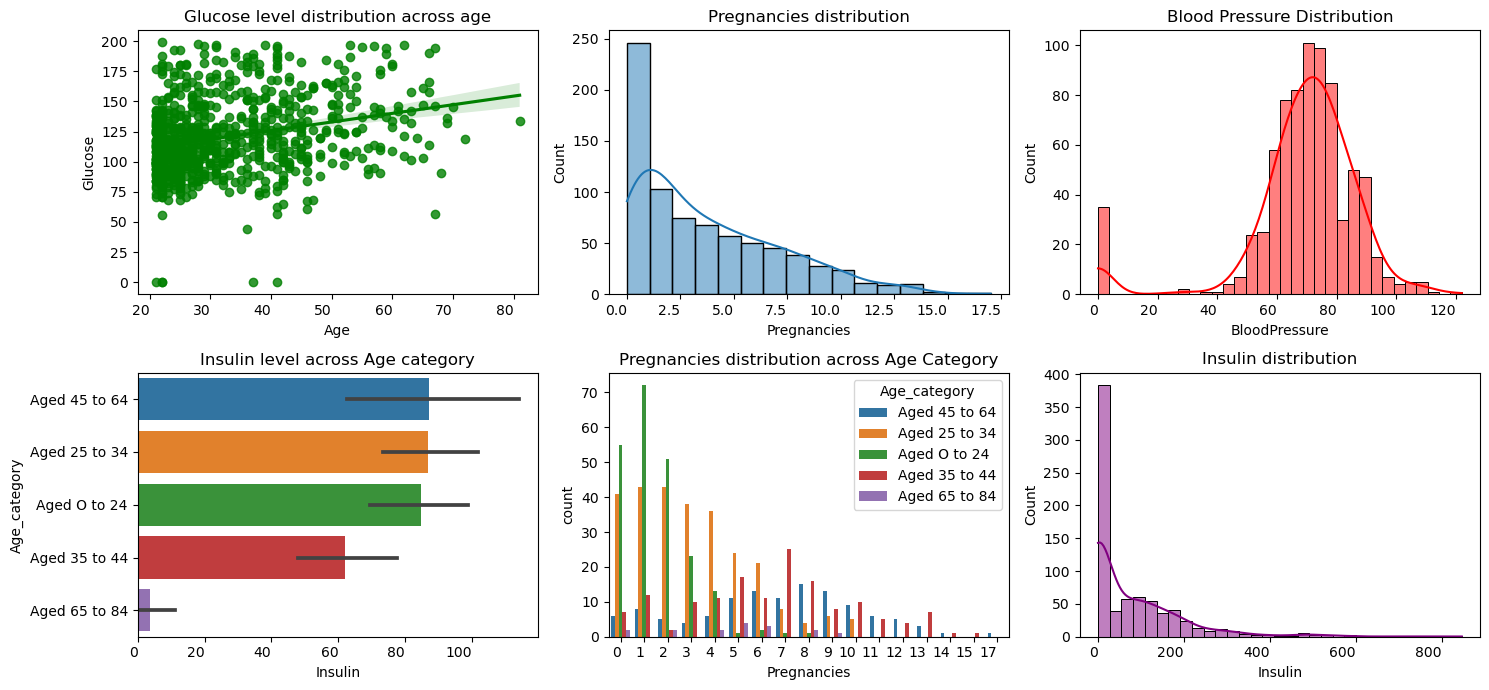

In [47]:
#create a grid subplots 
fig, ax = plt.subplots(2,3, figsize=(15,7))

# Create a regression plot for 'Age' vs 'Glucose'.
sns.regplot(x='Age', y='Glucose', data=data, color='Green', ax=ax[0,0]).set_title('Glucose level distribution across age')
# Create a histogram with KDE for 'Pregnancies'.
sns.histplot(x='Pregnancies', kde=True, data=data, ax=ax[0,1]).set_title('Pregnancies distribution')
# Create a histogram with KDE for 'BloodPressure'
sns.histplot(x='BloodPressure', kde=True, data=data, color='Red', ax=ax[0,2]).set_title('Blood Pressure Distribution')
# Create a bar plot for 'Insulin' vs 'Age_category'
sns.barplot(x='Insulin', y='Age_category', data=data, ax=ax[1,0]).set_title('Insulin level across Age category')
# Create a count plot for 'Pregnancies' with 'Age_category' as hue
sns.countplot(x='Pregnancies', hue='Age_category', data=data, ax=ax[1,1]).set_title("Pregnancies distribution across Age Category")
# Create a histogram with KDE for 'Insulin', set the color to purple
sns.histplot(x='Insulin', kde=True, data=data, color='Purple',ax=ax[1,2]).set_title('Insulin distribution')

# Adjust the x-axis tick labels and titles for all subplots.
for axes_row in ax:
        for axes in axes_row:
                if axes is not None:
                        axes.set_xticklabels(axes.get_xticklabels(), rotation=0, ha='right')
                        axes.set_title(axes.get_title(), fontsize=12)
        
plt.tight_layout()
plt.show()

**Boxplot of numerical columns in the diabetes dataset**

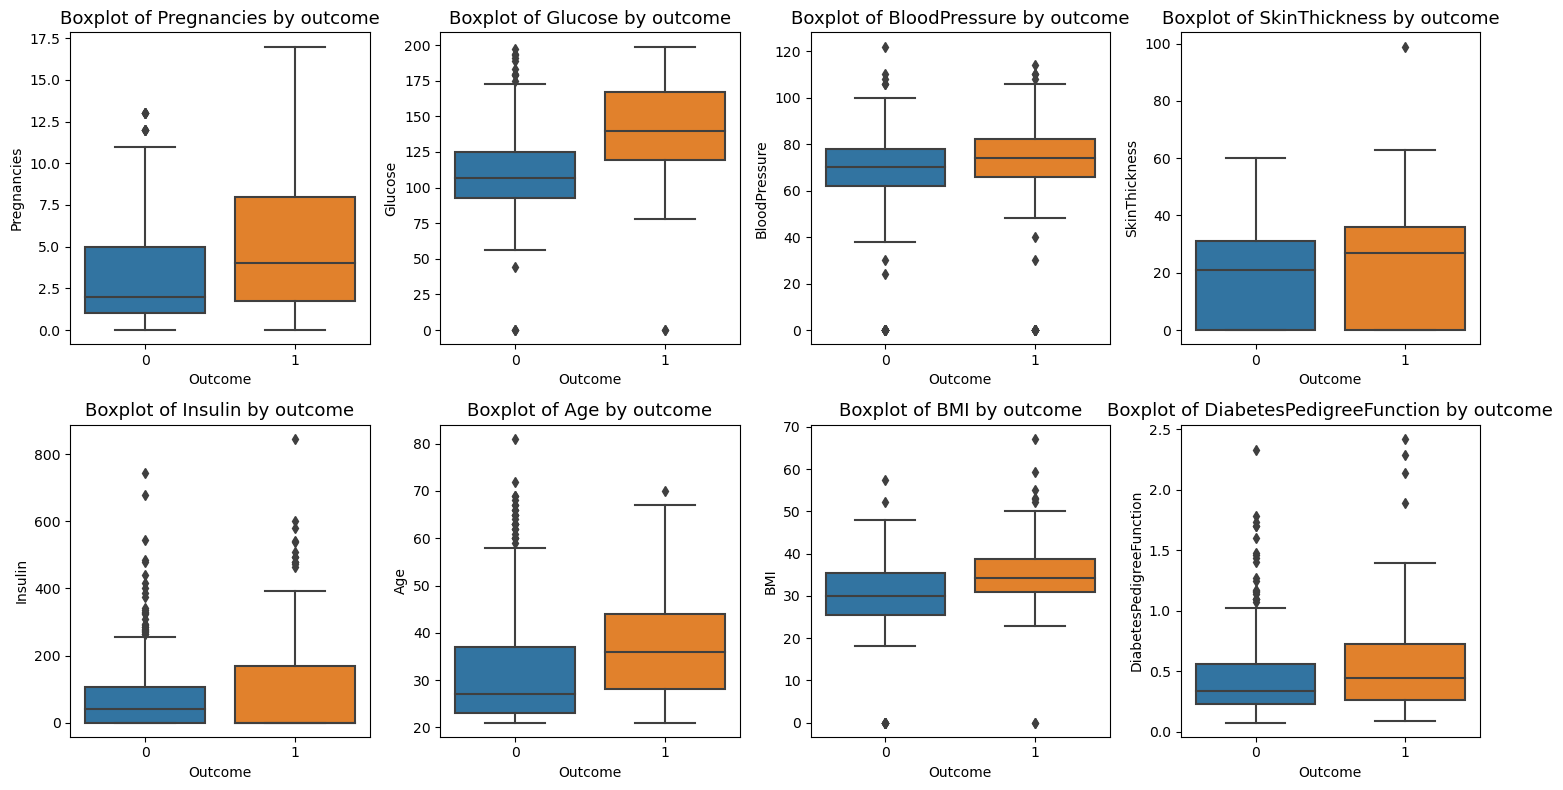

In [48]:
# Initialize an empty list to store the names of numerical variables.
num_var = []
# Assign the list of numerical variable names to num_var.
num_var =['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','Age','BMI',"DiabetesPedigreeFunction"]
# create a grid subplots and Flatten the array of axes to make it easier to iterate over.
fig, axs=plt.subplots(2,4,figsize=(15,8))
axs=axs.flatten()
"""
Loop through each numerical variable and its corresponding subplot index.
Create a box plot for the current variable grouped by 'Outcome'.
Set the title for the current subplot.
"""
for i, var in enumerate(num_var):
    sns.boxplot(y=var, x='Outcome', data=data, ax=axs[i])
    axs[i].set_title(f"Boxplot of {var} by outcome", fontsize=13)
fig.tight_layout()


plt.show()

**Handling Outliers**

In [49]:
from scipy import stats

# Calculate the z-scores for the numerical variables in data.
z_scores = stats.zscore(data[num_var])
# Define the threshold for identifying outliers.
threshold = 3
# Identify rows that have any z-score greater than the threshold.
outliers = (z_scores > threshold).any(axis=1)
# Remove the outliers from the data.
data = data[~outliers]

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               729 non-null    int64  
 1   Glucose                   729 non-null    int64  
 2   BloodPressure             729 non-null    int64  
 3   SkinThickness             729 non-null    int64  
 4   Insulin                   729 non-null    int64  
 5   BMI                       729 non-null    float64
 6   DiabetesPedigreeFunction  729 non-null    float64
 7   Age                       729 non-null    int64  
 8   Outcome                   729 non-null    int64  
 9   Age_category              729 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 62.6+ KB


**statistical description of the dataset**

In [50]:
# Display the summary statistics for the numerical columns in the data DataFrame.
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,3.831276,119.331962,68.975309,19.925926,68.460905,31.830453,0.450209,32.908093,0.337449
std,3.294235,31.371613,19.438673,15.618828,89.094492,7.514788,0.282474,11.293709,0.473164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.200000,0.243000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,22.000000,15.000000,32.000000,0.364000,29.000000,0.000000
75%,6.000000,138.000000,80.000000,32.000000,120.000000,36.300000,0.601000,40.000000,1.000000
max,13.000000,199.000000,122.000000,60.000000,415.000000,55.000000,1.461000,68.000000,1.000000


In [51]:
#checking for missing values

check_missing = data.isnull().sum() * 100/data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)


Series([], dtype: float64)

**Correlation plot**

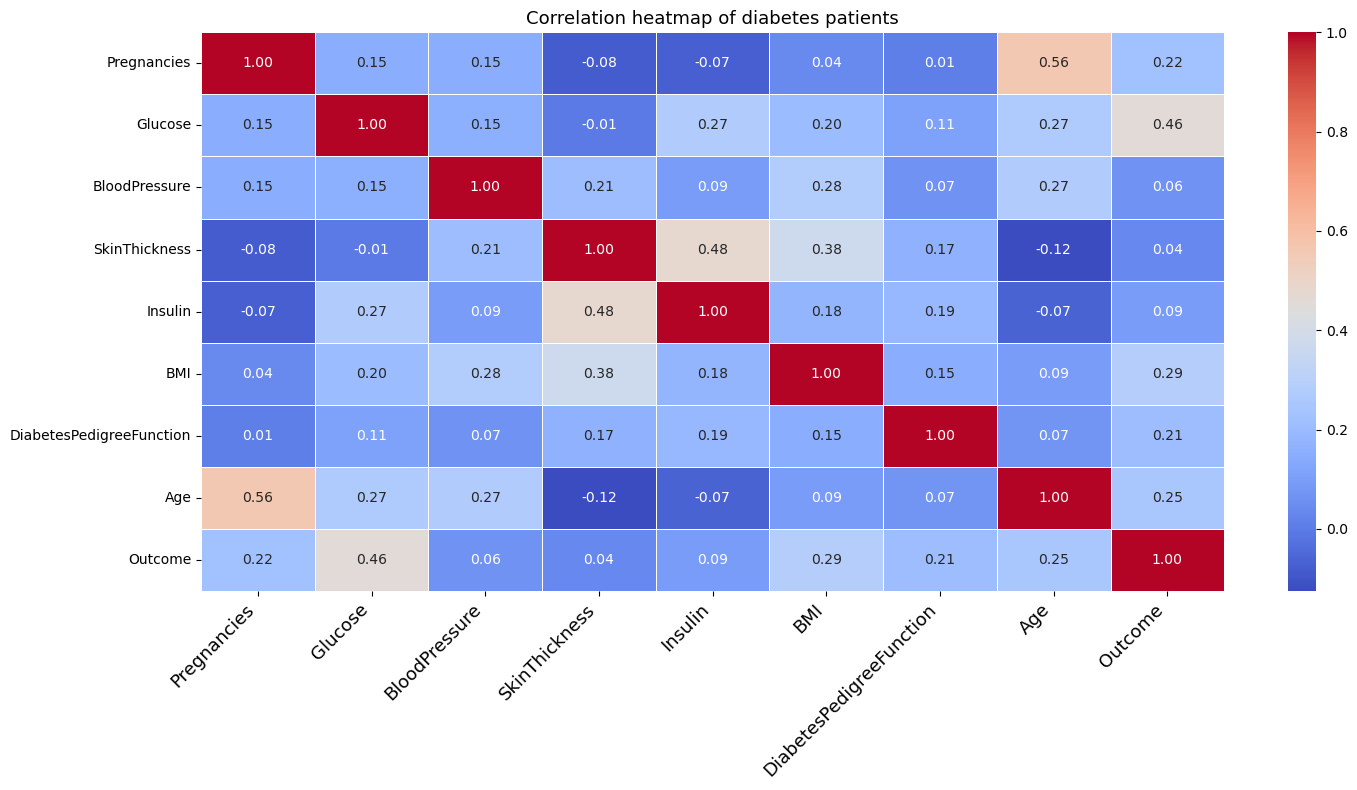

In [52]:
# Select numerical columns from the data DataFrame.
num_var = data.select_dtypes(include='number')
# Create a heatmap of the correlation matrix for numerical variables.
plt.figure(figsize=(15,8))
sns.heatmap(num_var.corr(), linewidths=0.5 ,annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation heatmap of diabetes patients', fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=13)

plt.tight_layout()
plt.show()

**Data Preprocessing**

In [53]:
#Import Machine Learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from skopt.space import Real, Categorical, Integer
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [54]:
data = data.drop('Age_category', axis=1,) # Drop the 'Age_category' column from the data DataFrame.

Label Encode category variables

In [55]:
"""
Iterate through each column that contains object data type.
Initialize LabelEncoder.
Fit the encoder to unique values in the column.
"""
for col in data.select_dtypes(include='object').columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(data[col].unique())
    data[col] = label_encoder.transform(data[col])
    
    print(f"{col}: {data[col].unique()}")


Standard Scaler

In [56]:
"""Initialize the StandardScaler,
    Fit the scaler to the data,
    Transform the data using the fitted scaler,
    Display the first 5 rows of the scaled data.
"""
scaler = StandardScaler()
scaler.fit(data)

data[0:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


Train Test split

In [57]:
# Drop the specified columns from the data to create the features DataFrame
features = data.drop(columns=['Outcome','SkinThickness',], axis=1)

# Assign the 'Outcome' column as the target variable
target = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=42)

# Print the shape of the testing set and the training set
print('Testing set:', X_test.shape, y_test.shape)
print('Training set:', X_train.shape, y_train.shape)

Testing set: (146, 7) (146,)
Training set: (583, 7) (583,)


In [58]:
# Print information about the y_train variable
y_train.info()

# Print the columns of the X_train DataFrame
X_train.columns

<class 'pandas.core.series.Series'>
Index: 583 entries, 262 to 108
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
583 non-null    int64
dtypes: int64(1)
memory usage: 9.1 KB


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

**Model Selection**
For predicting the diabetes outcome of patients. I'll be using the following Machine Learning algorithm.

`1` Logistic Regression\
`2` XGBoost Classifier

**- Model**

In [59]:
#Initialize the Logistic Regression model.
log_model = LogisticRegression()

"""Define the parameter grid for GridSearchCV:
- 'solver': Various solvers for optimization.
- 'max_iter': Maximum number of iterations for the solvers.
- 'class_weight': Weights associated with classes in the 'balanced' mode.
"""
params_grid = { 
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  
    'max_iter': [100, 10000],  
    'class_weight': ['balanced'], 
}

"""
Initialize the GridSearchCV object:
- 'log_model': Logistic Regression model.
- 'params_grid': Parameter grid defined above.
- 'cv': 5-fold cross-validation.
- 'error_score': Raise an error if one occurs during fitting.
Fit the GridSearchCV object on the training data.
"""

grid_search = GridSearchCV(log_model, params_grid, cv=5, error_score='raise')
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV and accuracy score
print('Best parameter:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

# Store the best parameters in a variable for later use.
best_log_params = grid_search.best_params_


Best parameter: {'class_weight': 'balanced', 'max_iter': 100, 'solver': 'newton-cg'}
Best Score: 0.7529177718832891


In [60]:
# Initialize the Logistic Regression model with the best parameters found by GridSearchCV
log_model = LogisticRegression(**best_log_params)

# Fit the Logistic Regression model on the training data
log_model.fit(X_train, y_train)

log_model

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [61]:
# Use the trained Logistic Regression model to make predictions on the test data
log_pred = log_model.predict(X_test)

# Display the first 5 predictions
log_pred[0:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [62]:
# Use the trained Logistic Regression model to predict probabilities on the test data
log_proba = log_model.predict_proba(X_test)

# Display the predicted probabilities for the first 5 samples
log_proba[0:5]

array([[0.75107605, 0.24892395],
       [0.77794357, 0.22205643],
       [0.12244492, 0.87755508],
       [0.10391226, 0.89608774],
       [0.82354577, 0.17645423]])

**XGBoost Model**

In [63]:
# Initialize the XGBoost Classifier model.
xgb_model = XGBClassifier()

"""
Define the parameter grid for BayesSearchCV:
- 'n_estimators': Number of boosting rounds.
- 'max_depth': Maximum depth of a tree.
- 'learning_rate': Step size shrinkage to prevent overfitting.
- 'subsample': Subsample ratio of the training instance.
- 'colsample_bytree': Subsample ratio of columns when constructing each tree.
- 'gamma': Minimum loss reduction required to make a further partition on a leaf node.
- 'min_child_weight': Minimum sum of instance weight (hessian) needed in a child.
"""
param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1,0.2],
    'subsample':[0.8,0.9,1.0],
    'colsample_bytree':[0.8,0.9,1.0],
    'gamma':[0,0.1,0.2],
    'min_child_weight':[1,2,3]
}

"""
Initialize the BayesSearchCV object:
- 'xgb_model': XGBoost Classifier model.
- 'param_grid': Parameter grid defined above.
- 'cv': 5-fold cross-validation.
- 'error_score': Raise an error if one occurs during fitting.
Fit the BayesSearchCV object on the training data.
"""
bayes_search = BayesSearchCV(xgb_model, param_grid, cv=5, error_score='raise')
bayes_search.fit(X_train, y_train)

# Print the best hyperparameters found by BayesSearchCV and accuracy score.
print('Best Hyperparameter:',bayes_search.best_params_)
print('Best Score(Accuracy);', bayes_search.best_score_)

# store the best parameters as a variable
best_xgb_params = bayes_search.best_params_

Best Hyperparameter: OrderedDict([('colsample_bytree', 0.9), ('gamma', 0.0), ('learning_rate', 0.01), ('max_depth', 7), ('min_child_weight', 3), ('n_estimators', 200), ('subsample', 0.8)])
Best Score(Accuracy); 0.7563071028588271


In [64]:
# Initialize the XGBoost Classifier model with the best parameters found by BayesSearchCV
xgb_model = XGBClassifier(**best_xgb_params)

# Fit the XGBoost Classifier model on the training data
xgb_model.fit(X_train, y_train)

xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [65]:
# Use the trained XGBoost Classifier model to make predictions on the test data
xgb_pred = xgb_model.predict(X_test)

# Display the first 5 predictions
xgb_pred[0:5]

array([0, 0, 0, 1, 0])

**Model Evaluation**

In [66]:
"""
Define a function to plot confusion matrices for multiple models.
Parameters:
- y_true: True labels.
- y_preds: List of predicted labels for each model.
- model_names: List of model names.
Returns:
- None
"""
def plot_confusion_matrix(y_true, y_preds, model_names):
    fig, axes = plt.subplots(1, len(y_preds), figsize=(18,7))
    
    for i, (pred, model_name) in enumerate(zip(y_preds, model_names)):
        
        cm = confusion_matrix(y_true, pred, normalize=None)
        ax = axes[i]
        sns.heatmap(cm, annot=True, ax=ax, fmt='d' ,cmap='viridis', cbar=False)
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('Actual labels')
        ax.set_title(f'Confusion Matrix - {model_name}')
        ax.xaxis.set_ticklabels(['False Positive', 'True Negative'])
        ax.yaxis.set_ticklabels(['True Positive ', 'False Negative'])
    
    plt.tight_layout()    
    plt.show()


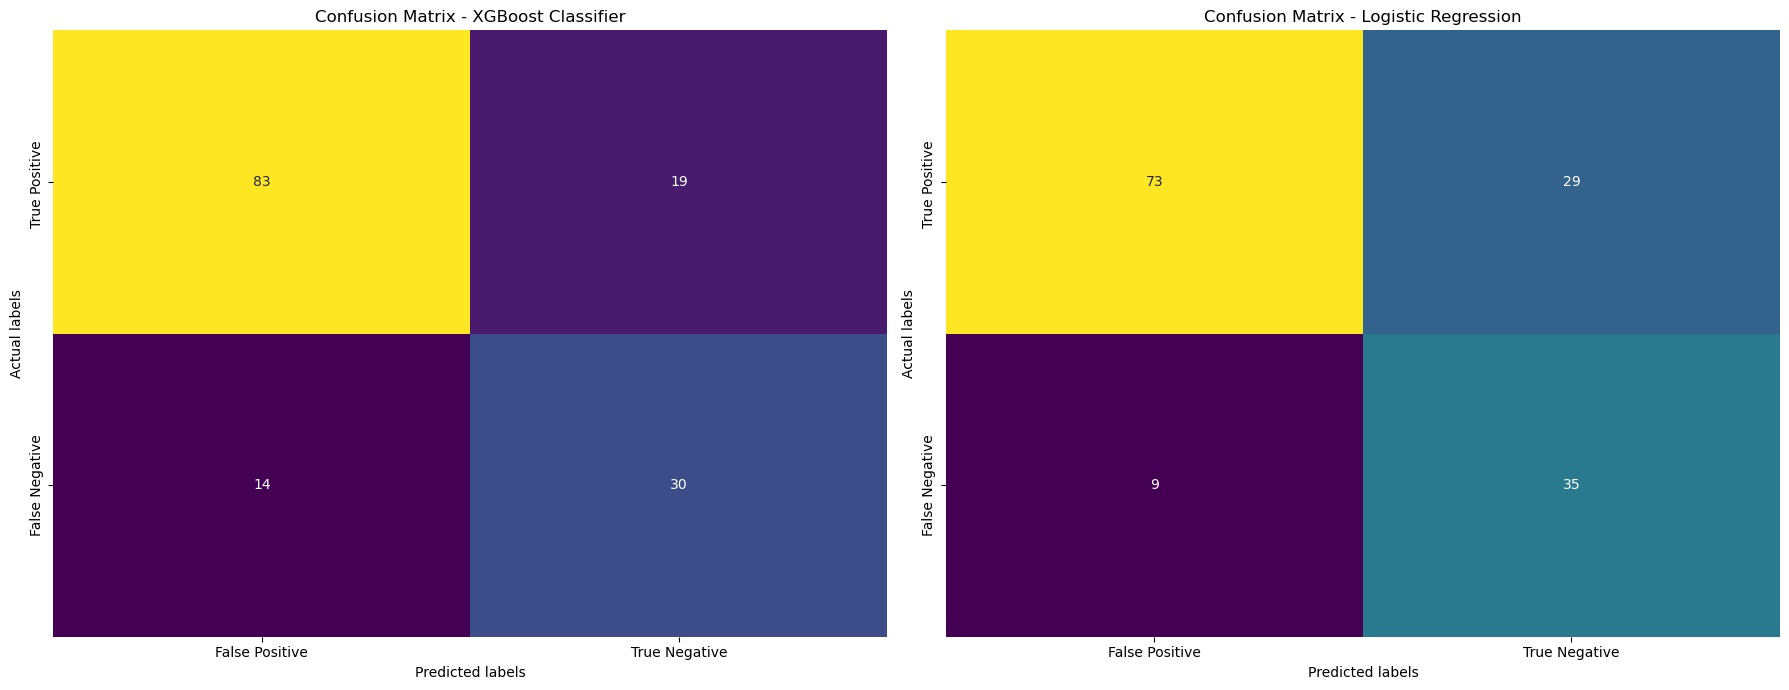

In [67]:
# Define the true labels from the test set
y_true = y_test

# Define the predicted labels from the XGBoost and Logistic Regression models
y_preds= [xgb_pred, log_pred ]

# Define the names of the models
model_names = ['XGBoost Classifier','Logistic Regression']

# Use the plot_confusion_matrix function to plot the confusion matrices
plot_confusion_matrix(y_true, y_preds, model_names)

- True Positive (TP): The model correctly predicts positive instances as positive.
- False Positive (FP): The model incorrectly predicts negative instances as positive.
- False Negative (FN): The model incorrectly predicts positive instances as negative.
- True Negative (TN): The model correctly predicts negative instances as negative.

The confusion matrix heatmap visualizes the true positive and true negative value counts in the 2 machine learning models.
`The Logistic Regression` has  `38` false positive and negative values, and `108` true positive and True negative.\
`The XGBoost classifier` has `33` false positive and negative values, and `113` true positive and True negative.\


overall, the `XGBoost classifier` have great accuracies than the `Logistic Regression`

**Features distribution**

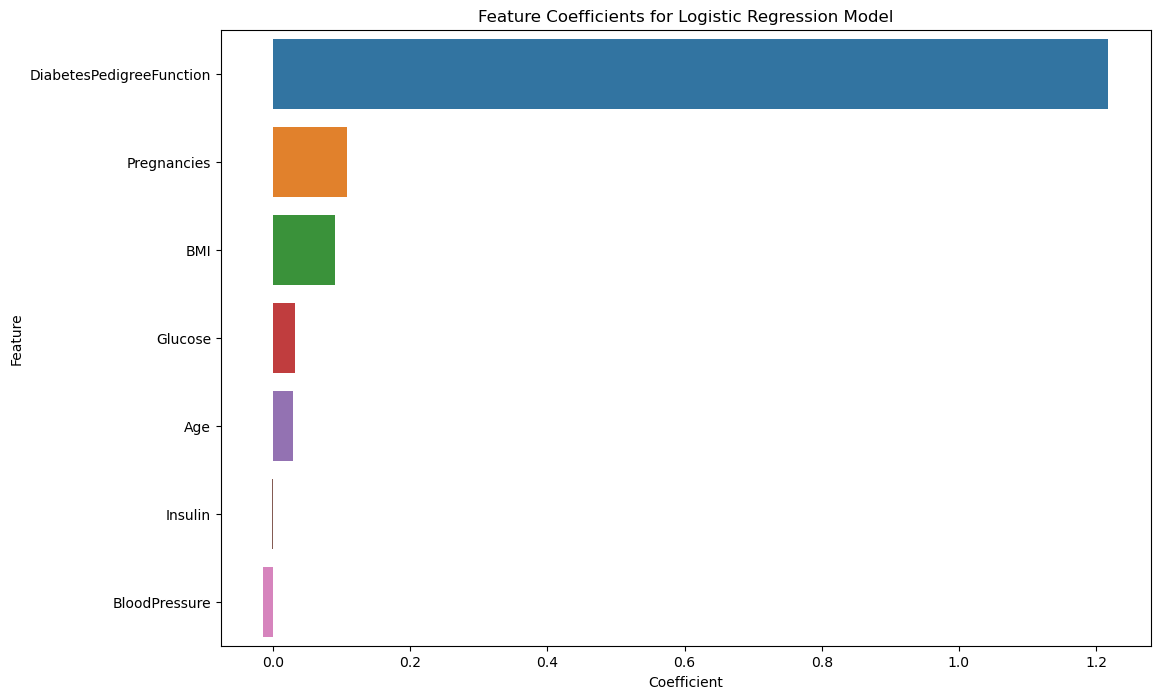

In [68]:
# Get coefficients and feature names
coefficients = log_model.coef_[0]
feature_names = X_train.columns

# Create a DataFrame to store feature names and coefficients. Sort by their coefficient in descending order
feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_coefficients = feature_coefficients.sort_values(by='Coefficient', ascending=False)

# Plot the feature coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_coefficients)
plt.title('Feature Coefficients for Logistic Regression Model')
plt.show()

**Performance Report**

In [69]:
# Calculate R2 Score, Mean Squared Error, and Mean Absolute Error for the XGBoost Classifier predictions
r2_score_xgb = r2_score(y_test, xgb_pred)
mse_xgb = mean_squared_error(y_test, xgb_pred)
mae_xgb = mean_absolute_error(y_test, xgb_pred)

# Calculate R2 Score, Mean Squared Error, and Mean Absolute Error for the Logistic Regression predictions
r2_score_log = r2_score(y_test, log_pred)
mse_log = mean_squared_error(y_test, log_pred)
mae_log = mean_absolute_error(y_test, log_pred)

# Create lists of evaluation metrics for each model
list_r2_score = [r2_score_log, r2_score_xgb,]
list_mse = [mse_log, mse_xgb,]
list_mae = [mae_log, mae_xgb,]

# Create a DataFrame to report the evaluation metrics
Report = pd.DataFrame(list_r2_score, index=['Logistic Regression','XGBoost Classifier'])
Report.columns =['R2 Score']
Report.insert(loc=1,column='Mean Squared Error',value=list_mse)
Report.insert(loc=2, column='Mean Absolute Error', value=list_mae)

# Set the name of the columns in the DataFrame and print the report
Report.columns.name = 'Algorithm'
print(Report)

Algorithm            R2 Score  Mean Squared Error  Mean Absolute Error
Logistic Regression -0.236185            0.260274             0.260274
XGBoost Classifier  -0.073529            0.226027             0.226027


**Classification Report**

In [70]:
#Print the Classification report for the model  predictions
print(f"XGBoostClassifier \n\n{classification_report(y_test, xgb_pred)}")
print(f"Logistic Regression \n\n{classification_report(y_test, log_pred)}")


XGBoostClassifier 

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       102
           1       0.61      0.68      0.65        44

    accuracy                           0.77       146
   macro avg       0.73      0.75      0.74       146
weighted avg       0.78      0.77      0.78       146

Logistic Regression 

              precision    recall  f1-score   support

           0       0.89      0.72      0.79       102
           1       0.55      0.80      0.65        44

    accuracy                           0.74       146
   macro avg       0.72      0.76      0.72       146
weighted avg       0.79      0.74      0.75       146



**Conclusion**

Based on the metrics, visualizations, and analysis provided, the `XGBoost classifier` and `Logistic Regression` , the later emerged as the preferred machine learning model for predicting patient diabetes status. This conclusion is drawn from its higher accuracy of `77%`, for `XGBoost classifier`.

**Model Deployment**

In [71]:
import os
import pickle

In [72]:
# Define the folder path where the models will be saved
folder_path = 'saved_model'

# Create the directory
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Define the file paths for saving the models
model_file_1 = os.path.join(folder_path, "log_model.pkl")
model_file_2 =  os.path.join(folder_path, "xgb_model.pkl")

# Save the Logistic Regression model to a file
with open(model_file_1, 'wb') as file:
    pickle.dump(log_model, file)
    
# Save the XGBoost Classifier model to a file    
with open(model_file_2, 'wb') as file:
    pickle.dump(xgb_model, file)
    
print(f"Model saved to {model_file_1} and {model_file_2}")

Model saved to saved_model\log_model.pkl and saved_model\xgb_model.pkl
